<a href="https://colab.research.google.com/github/sinaapolo969/learning_PyTorch/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 

In [ ]:
 vector = torch.tensor([[7, 7], [3, 4]])
 vector

tensor([[7, 7],
        [3, 4]])

In [ ]:
vector.shape

torch.Size([2, 2])

In [ ]:
matrix = torch.tensor([[[2 , 3],
                        [3 , 4]],
                       [[5, 6],
                        [7, 8]]])
matrix

tensor([[[2, 3],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [ ]:
matrix.shape

torch.Size([2, 2, 2])

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

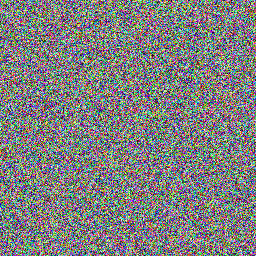

In [ ]:
#convert random tensor to an image
tensor = torch. rand(3,256,256)
transform = T.ToPILImage()
img = transform(tensor)
img

In [ ]:
tensorA = torch.tensor([[1, 2, 4],
                        [2, 3, 4]])
tensorA 

tensor([[1, 2, 4],
        [2, 3, 4]])

In [ ]:
tensorA.T

tensor([[1, 2],
        [2, 3],
        [4, 4]])

In [ ]:
tensorA

tensor([[1, 2, 4],
        [2, 3, 4]])

In [ ]:
tensorA.max()

tensor(4)

In [ ]:
!nvidia-smi

Tue Feb 21 16:08:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    17W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch 

In [ ]:
torch.manual_seed(seed = 0)
tensor = torch.randn(7, 7)

In [ ]:
tensor

tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160],
        [-2.1152,  0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377],
        [ 1.1168, -0.2473, -1.3527, -1.6959,  0.5667,  0.7935,  0.5988],
        [-1.5551, -0.3414,  1.8530,  0.7502, -0.5855, -0.1734,  0.1835],
        [ 1.3894,  1.5863,  0.9463, -0.8437, -0.6136,  0.8728,  1.0554],
        [ 0.1778, -0.2303, -0.3918,  0.5433, -0.3952,  0.2055,  0.7440],
        [ 1.5210,  3.4105, -1.5312, -1.2341,  1.8197, -0.5515, -1.3253]])

In [ ]:
torch.manual_seed(seed = 0)
tensor2 = torch.randn(1, 7)

In [ ]:
torch.matmul(tensor, tensor2.T)

tensor([[-3.1132],
        [-0.4052],
        [ 2.2938],
        [-4.9556],
        [-0.9954],
        [ 1.9452],
        [ 2.2410]])

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

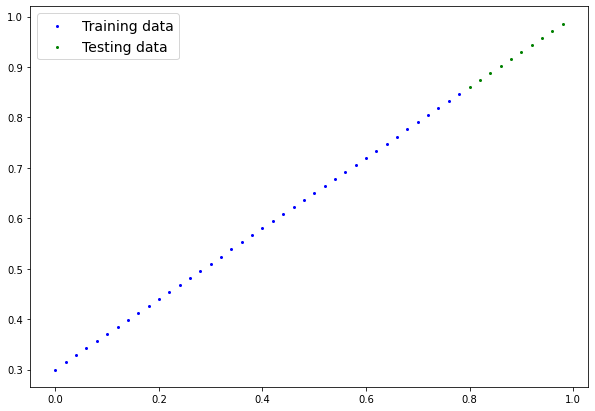

In [ ]:
plot_predictions()

In [ ]:
import torch
from torch import nn
class linear_regression_model(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x : torch.tensor):
    return self.weight * x + self.bias


In [ ]:
torch.manual_seed(seed = 42)
model1 = linear_regression_model()
p = list(model1.parameters())
p

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# make some random predictions with y_test
y_pred = model1(y_test)
y_pred

tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
  y_pred1 = model1(y_test)
y_pred1

tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]])

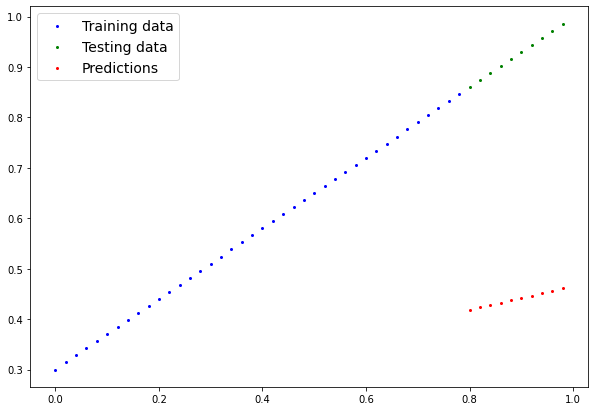

In [ ]:
plot_predictions(predictions = y_pred1)

In [ ]:
# training a model with pytorch

i need a omptimizer and a loss function to build a training loop

In [ ]:
loss_f = nn.L1Loss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [ ]:
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model1.train()

  y_pred = model1(X_train)

  loss = loss_f(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model1.eval()

  with torch.inference_mode():

      test_pred = model1(X_test)

      test_loss = loss_f(test_pred, y_test.type(torch.float))

      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

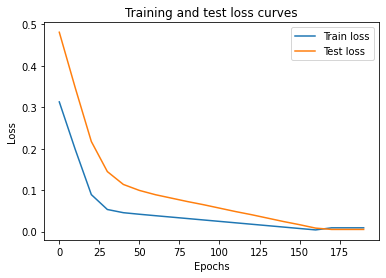

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# code to save a pytorch model
from pathlib import Path
def save_model(model):

  #model directori
  model_path = Path('models')
  model_path.mkdir(parents = True, exist_ok = True)

  #model save path
  model_name = 'pytorch_linearregression.pth'
  model_save_path = model_path / model_name
  print(model_save_path)
  #save the model
  torch.save(model.state_dict(), f = model_save_path)

In [ ]:
save_model(model1)

models/pytorch_linearregression.pth


In [ ]:
#code for loading the model
def load_model():
  model_save_path = 'models/pytorch_linearregression.pth'
  model = torch.load(model_save_path)
  return model

In [ ]:
model1_loaded = linear_regression_model()
model1_loaded.load_state_dict(load_model())

<All keys matched successfully>

In [ ]:
model1_loaded.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

# Train a regression model with aanother format

In [ ]:
from torch import nn 
import torch
import numpy as np
import pandas as pd

class linear_regression_model_v2(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_model = nn.Linear(in_features = 1, out_features = 1)
  
  def forward(self, x):
    return self.linear_model(x)

In [ ]:
torch.manual_seed(42)
model_1 = linear_regression_model_v2()
model_1.state_dict()

OrderedDict([('linear_model.weight', tensor([[0.7645]])),
             ('linear_model.bias', tensor([0.8300]))])

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 1000

for epoch in range(epochs):

  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn( test_pred, y_test)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


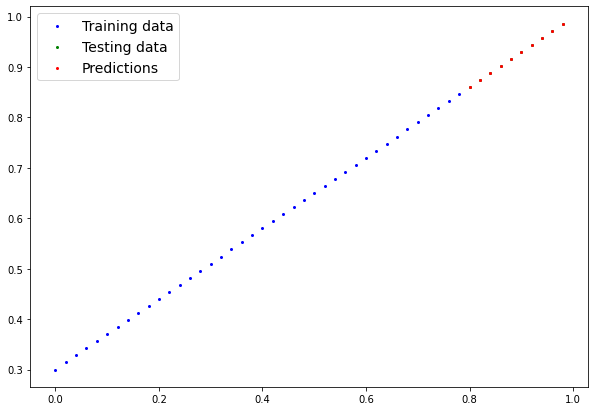

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
plot_predictions(predictions = y_preds.cpu().detach().numpy())

## Building a classification model using neural network

In [8]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 
import math 
import seaborn as sns
import numpy as np
import pandas as pd

### loading data set and spliting train and test

In [2]:
# getting data ready for classification problem
from sklearn.datasets import make_circles

In [10]:
X, y = make_circles(1000, noise = 0.03, random_state = 42)

In [4]:
data = pd.DataFrame({'X1' : X[:, 0],
                    'X2' : X[:, 1],
                    'label' : y})
data.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


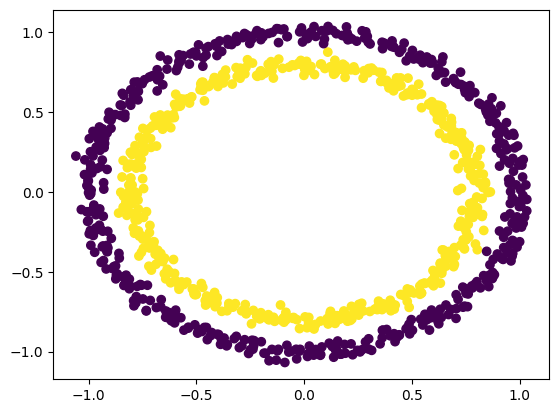

In [6]:
# lets visualize our data 
plt.scatter(x = data.X1, y = data.X2, c= y)

In [11]:
# convert data to tensors and split 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### building modle
we are gonna apply device agnostic code for this model 

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cpu'

In [21]:
# initializing model with nn.Sequantial
model0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5, bias = True),
    nn.Linear(in_features = 5, out_features = 1, bias = True)
).to(device)

In [22]:
model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
untrained_pred = model0(X_test.to(device))
print(f"predictions {untrained_pred[:10]}\n labels: {y_test[:10]}")

predictions tensor([[0.1176],
        [0.1406],
        [0.1763],
        [0.1005],
        [0.3650],
        [0.3775],
        [0.2926],
        [0.3486],
        [0.1682],
        [0.1442]], grad_fn=<SliceBackward0>)
 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### setup loss and optimizer functions


In [26]:
loss_fn = nn.BCEWithLogitsLoss() # binary cross entropy loss 

optimizer = torch.optim.SGD(model0.parameters(), lr = 0.1) # stochastic gradient decsent

In [27]:
# setting evaluation metric
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct / len(y_pred)) * 100

### lets create our training loop 